# Opdracht 3 - Pandas & Visualisatie

##### Deze Notebook werd geschreven voor het Evaluatiemoment op 18/04/2023 door Sam Corbeel

## 1. Modules

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlk
import os
from fuzzywuzzy import fuzz
import seaborn as sns
import matplotlib.cm as cm

## 2. Data Locaties & Files importeren

In [295]:
os.getcwd()

'C:\\Users\\samco\\OneDrive\\Bureaublad\\Syntra\\3. Opdrachten\\3. opdracht 3 - Visualisatie 20230418'

In [296]:
os.chdir(r'C:\Users\samco\OneDrive\Bureaublad\Syntra\3. Opdrachten\3. opdracht 3 - Visualisatie 20230418')

In [297]:
os.getcwd()

'C:\\Users\\samco\\OneDrive\\Bureaublad\\Syntra\\3. Opdrachten\\3. opdracht 3 - Visualisatie 20230418'

In [298]:
df_ads = pd.read_excel('ads.xlsx')
df_clicks = pd.read_csv('clicks.csv', sep = ';')
df_users = pd.read_csv('users.csv', sep= '|')
df_websites = pd.read_csv('websites.csv', sep= ',')

## 3. Queries

###### Niet van toepassing voor deze notebook

## 4. Handige functies

##### Niet van toepassing voor deze notebook

## 5. Main Body

### Preprocessing: clean the data

In [299]:
# rename the id column to ad_in

df_ads.rename(columns={'id':'ad_id'}, inplace = True)

In [300]:
# rename the id column to user_id

df_users.rename(columns={'id':'user_id'}, inplace = True)

In [301]:
df_clicks['website'].value_counts()

www.facebook.com            13009
http://www.facebook.com      5073
www.imdb.com                 4288
https://www.facebook.com     3332
http://www.imdb.com          1749
www.sporza.be                1579
https://www.imdb.com         1100
http://www.sporza.be          578
https://www.sporza.be         385
Name: website, dtype: int64

In [302]:
df_clicks['website'] = df_clicks['website'].str.replace(r'https?://', '', case=False)

C:\Users\samco\AppData\Local\Temp\ipykernel_21916\658614287.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clicks['website'] = df_clicks['website'].str.replace(r'https?://', '', case=False)


In [303]:
df_clicks

,click_id,website,user_id,ad_id,did_click
0,click0,www.imdb.com,user0,32,False
1,click1,www.imdb.com,user0,10,False
2,click2,www.facebook.com,user0,6,False
3,click3,www.facebook.com,user0,30,False
4,click4,www.facebook.com,user0,43,False
...,...,...,...,...,...
31088,click13,www.facebook.com,user999,56,False
31089,click14,www.facebook.com,user999,67,False
31090,click15,www.facebook.com,user999,55,False
31091,click16,www.facebook.com,user999,86,True


In [304]:
mapping_gender = {'male': 'M', 'female': 'F'}

df_users['gender'] = df_users['gender'].map(mapping_gender)

In [305]:
# make copy of Age column

df_users['user_age_intervals_ad'] = df_users['age']

In [306]:
# Define the dictionary to map integer values to intervals

age_intervals = {'18-24': (18, 24),
                 '25-34': (25, 34),
                 '35-44': (35, 44),
                 '45-54': (45, 54),
                 '55+': (55, float('inf'))}

def categorize_age(age):
    for interval, (lower, upper) in age_intervals.items():
        if lower <= age <= upper:
            return interval
    return None

# Apply the categorize_age function to the 'age' column to create a new column 'age_interval'
df_users['user_age_intervals_ad'] = df_users['age'].apply(categorize_age)

In [328]:
df_ads.rename(columns={'target_age':'target_age_ad'}, inplace = True)
df_ads.rename(columns={'category':'category_ad'}, inplace = True)
df_ads.rename(columns={'topic':'topic_ad'}, inplace = True)
df_ads.head()

,ad_id,category_ad,topic_ad,target_age_ad
0,0,sports,fitness,18-24
1,1,sports,fitness,25-34
2,2,sports,fitness,35-44
3,3,sports,fitness,45-54
4,4,sports,fitness,55+


In [329]:
df_users.rename(columns={'age':'user_age_exact'}, inplace = True)

df_users.head()

,user_id,ads_shown,user_age_exact,gender,location,user_age_intervals_ad
0,user0,51,22,F,Netherlands,18-24
1,user1,33,51,F,France,45-54
2,user2,21,53,M,Belgium,45-54
3,user3,24,38,M,Germany,35-44
4,user4,77,19,M,Luxembourg,18-24


In [330]:
df_clicks.head()

df_clicks

,click_id,website,user_id,ad_id,did_click
0,click0,www.imdb.com,user0,32,False
1,click1,www.imdb.com,user0,10,False
2,click2,www.facebook.com,user0,6,False
3,click3,www.facebook.com,user0,30,False
4,click4,www.facebook.com,user0,43,False
...,...,...,...,...,...
31088,click13,www.facebook.com,user999,56,False
31089,click14,www.facebook.com,user999,67,False
31090,click15,www.facebook.com,user999,55,False
31091,click16,www.facebook.com,user999,86,True


In [331]:
df_websites.rename(columns={'target_age':'target_age_website'}, inplace = True)
df_websites.rename(columns={'category':'category_website'}, inplace = True)

df_websites.head()

,url,category_website,target_age_website
0,www.sporza.be,sports,20-60
1,www.facebook.com,social,18-35
2,www.imdb.com,movies,30-50


In [332]:
df_merged = pd.merge(left = df_clicks, right = df_users, left_on = 'user_id', right_on = 'user_id')

In [333]:
df_merged = pd.merge(left = df_merged, right = df_ads, left_on = 'ad_id', right_on = 'ad_id')

In [334]:
df_merged = pd.merge(left = df_merged, right = df_websites, left_on = 'website', right_on = 'url')

In [335]:
# Check total rows and columns and compare with Click file (above)

df_merged

,click_id,website,user_id,ad_id,did_click,ads_shown,user_age_exact,gender,location,user_age_intervals_ad,category_ad,topic_ad,target_age_ad,url,category_website,target_age_website
0,click0,www.imdb.com,user0,32,False,51,22,F,Netherlands,18-24,entertainment,movies,35-44,www.imdb.com,movies,30-50
1,click76,www.imdb.com,user4,32,False,77,19,M,Luxembourg,18-24,entertainment,movies,35-44,www.imdb.com,movies,30-50
2,click8,www.imdb.com,user15,32,False,41,70,M,Luxembourg,55+,entertainment,movies,35-44,www.imdb.com,movies,30-50
3,click22,www.imdb.com,user18,32,False,58,21,F,France,18-24,entertainment,movies,35-44,www.imdb.com,movies,30-50
4,click14,www.imdb.com,user38,32,False,48,28,F,Netherlands,25-34,entertainment,movies,35-44,www.imdb.com,movies,30-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31088,click31,www.sporza.be,user782,101,True,49,53,F,Luxembourg,45-54,health,fitness,25-34,www.sporza.be,sports,20-60
31089,click13,www.sporza.be,user804,101,False,18,30,M,France,25-34,health,fitness,25-34,www.sporza.be,sports,20-60
31090,click2,www.sporza.be,user828,101,False,9,53,M,Netherlands,45-54,health,fitness,25-34,www.sporza.be,sports,20-60
31091,click26,www.sporza.be,user856,101,False,44,19,F,Netherlands,18-24,health,fitness,25-34,www.sporza.be,sports,20-60


In [336]:
df_merged.pop('website')

0         www.imdb.com
1         www.imdb.com
2         www.imdb.com
3         www.imdb.com
4         www.imdb.com
             ...      
31088    www.sporza.be
31089    www.sporza.be
31090    www.sporza.be
31091    www.sporza.be
31092    www.sporza.be
Name: website, Length: 31093, dtype: object

In [337]:
df_merged.head()

,click_id,user_id,ad_id,did_click,ads_shown,user_age_exact,gender,location,user_age_intervals_ad,category_ad,topic_ad,target_age_ad,url,category_website,target_age_website
0,click0,user0,32,False,51,22,F,Netherlands,18-24,entertainment,movies,35-44,www.imdb.com,movies,30-50
1,click76,user4,32,False,77,19,M,Luxembourg,18-24,entertainment,movies,35-44,www.imdb.com,movies,30-50
2,click8,user15,32,False,41,70,M,Luxembourg,55+,entertainment,movies,35-44,www.imdb.com,movies,30-50
3,click22,user18,32,False,58,21,F,France,18-24,entertainment,movies,35-44,www.imdb.com,movies,30-50
4,click14,user38,32,False,48,28,F,Netherlands,25-34,entertainment,movies,35-44,www.imdb.com,movies,30-50


### Investigate Business Questions (visualisaties)

#### Krijgen Vrouwen evenveel Ads te zien als mannen?

In [316]:
df_gender_grouped = df_merged.groupby('gender').sum()

df_gender_grouped['ads_shown']

gender
F    601396
M    599249
Name: ads_shown, dtype: int64

##### Antwoord: Vrouwen krijgen meer ads te zien.

#### Verdeling mannen en vrouwen in de dataset?

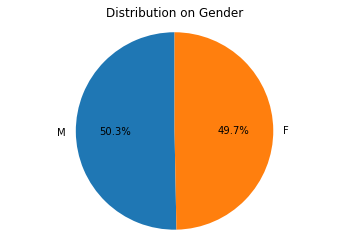

In [317]:
gender = 'gender'
values = df_merged[gender].value_counts()
labels = values.index
counts = values.values

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution on Gender')

plt.show()

##### Antwoord: er zitten net iets meer mannen in de dataset

#### Is er een significant verband tussen leeftijd en het aantal getoonde ads?

In [318]:
corr_age_ads_shown = pd.pivot_table(df_merged, values = 'ads_shown', index = ['user_age_exact'], columns = ['gender'])

corr_age_ads_shown

gender,F,M
user_age_exact,,
18,56.902185,56.143223
19,48.673582,58.551570
20,46.532847,52.671875
21,60.106599,38.756233
22,60.910773,53.291525
...,...,...
95,22.000000,NaN
96,19.000000,36.835616
97,NaN,45.000000


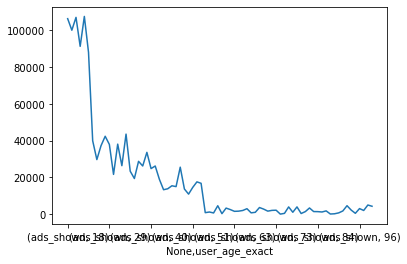

In [319]:
df_age_ads_total = df_merged[['gender', 'user_age_exact', 'ads_shown']]
df_age_ads_total = df_age_ads_total.groupby(['user_age_exact']).sum().unstack()
ax = df_age_ads_total.plot.line()

In [320]:
df_male = df_merged[df_merged['gender'] == 'M']
df_female = df_merged[df_merged['gender'] == 'F']

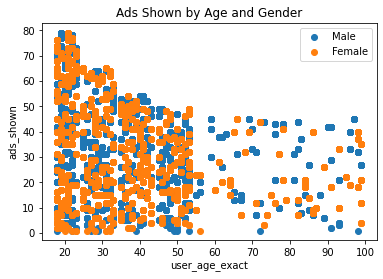

In [321]:
plt.scatter(df_male['user_age_exact'], df_male['ads_shown'], label='Male')
plt.scatter(df_female['user_age_exact'], df_female['ads_shown'], label='Female')

plt.xlabel('user_age_exact')
plt.ylabel('ads_shown')
plt.title('Ads Shown by Age and Gender')
plt.legend()
plt.show()

##### Antwoord: volgende correlatie kan gevonden worden, i.e. hoe jonger de user, hoe groter de kans dat deze een ad te zien krijgt.

#### Hoe vaak werd er op de verschillende websites doorgeklikt per land?

In [322]:
df_website_category = pd.pivot_table(df_merged, values = 'did_click', index = ['location'], columns = ['category_website'])

df_website_category

category_website,movies,social,sports
location,,,
Belgium,0.116822,0.097788,0.154955
France,0.140100,0.114698,0.139048
Germany,0.127467,0.123711,0.130000
Luxembourg,0.136467,0.110119,0.123529
Netherlands,0.132844,0.119762,0.132246


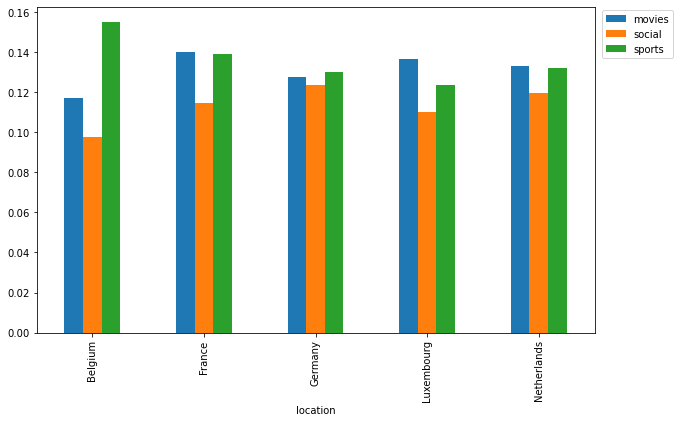

In [323]:
ax = df_website_category.plot.bar(figsize=(10, 6))
ax.legend(bbox_to_anchor=(0.7, 0., 0.45, 1.005))

## Export Data

In [324]:
writer = pd.ExcelWriter('output_file_saco2_20230418.xlsx', engine='xlsxwriter')

df_merged.to_excel(writer, sheet_name='merged_data', index=False)

writer.save()